# Testing the find_tilda_parameters function

This is a test for the `find_tilda_parameters` function from the `mean_cv_autocorr_v2` module. The function is designed to find parameters in a rescaled space based on given mean, autocorrelation, and coefficient of variation (CV) targets.


In [1]:
from simulation.mean_cv_autocorr_v2 import find_tilda_parameters
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
mu_target = 10
t_ac_target = 2
cv_target = 0.5
sigma_sum = 5
# get the parameters using the scaled equations
rho,  d, sigma_b, sigma_u = find_tilda_parameters(sigma_sum, mu_target, t_ac_target, cv_target)
print('Parameters found:', rho,  d, sigma_b, sigma_u)

Parameters found: 13.648894128877302 0.5346864459893306 1.9587170980324378 3.041282901967562


## Test Case 1: Plug Computed Parameter Back into Original Equations to Verify

In [3]:
from stats.mean import calculate_mean_from_params
from stats.variance import calculate_variance_from_params
from stats.cv import calculate_cv_from_params
from stats.fano_factor import calculate_fano_factor_from_params
from stats.autocorrelation import calculate_ac_from_params
import numpy as np
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
mu_target = 10
t_ac_target = 2
cv_target = 0.5
sigma_sum = 5

# get the parameters using the scaled equations
rho,  d, sigma_b, sigma_u = find_tilda_parameters(sigma_sum, mu_target, t_ac_target, cv_target)
print('Parameters found:', rho,  d, sigma_b, sigma_u)

# plug back in:
mu_est   = calculate_mean_from_params(rho, d, sigma_b, sigma_u)
var_est  = calculate_variance_from_params(rho, d, sigma_b, sigma_u)
cv_est   = calculate_cv_from_params(rho, d, sigma_b, sigma_u)
ac_est   = calculate_ac_from_params(rho, d, sigma_b, sigma_u, t_ac_target)

# print comparison:
print(f"Mean:   target={mu_target:.4f},   analytical={mu_est:.4f},   error={100*(mu_est-mu_target)/mu_target:.2f}%")
print(f"CV:     target={cv_target:.4f},    analytical={cv_est:.4f},    error={100*(cv_est-cv_target)/cv_target:.2f}%")
print(f"AC({t_ac_target!r}): target={np.exp(-1):.4f}, analytical={ac_est:.4f}, error={100*(ac_est-np.exp(-1))/np.exp(-1):.2f}%")


Parameters found: 13.648958929488582 0.5346920808250939 1.9587284407087322 3.0412715592912676
Mean:   target=10.0000,   analytical=10.0000,   error=0.00%
CV:     target=0.5000,    analytical=0.5000,    error=0.00%
AC(2): target=0.3679, analytical=0.3679, error=-0.00%


Loop through multiple parameter combos

In [5]:
mu_target = [1, 10, 50, 100, 500, 1000, 1500, 2000]
t_ac_target = [0.5, 1, 1.5, 2, 3, 5, 10, 50, 100]
cv_target = [0.5, 1, 1.5, 2, 5]
sigma_sum = [5, 10, 20, 30, 35, 40, 50, 60, 70]

# store the relative error for plotting later
error_data = {
    'sigma_sum': [],
    'mean_error': [],
    'cv_error': [],
    'ac_error': [],
    'mu': [],
    't_ac': [],
    'cv': []
}

success_data = {
    'success_count':0,
    'failure_count':0,
    'total_combo_count':len(mu_target) * len(t_ac_target) * len(cv_target) * len(sigma_sum)    
}

# loop through every combination
for mu in mu_target:
    for t_ac in t_ac_target:
        for cv in cv_target:
            for sigma in sigma_sum:
                # print(f"Testing with mu={mu}, t_ac={t_ac}, cv={cv}, sigma_sum={sigma}")

                # get the parameters using the scaled equations
                try:
                    rho,  d, sigma_b, sigma_u = find_tilda_parameters(sigma, mu, t_ac, cv)
                except Exception as e:
                    success_data['failure_count'] += 1
                    # print(f"Error: {e}")
                    break
                
                print(f"Testing with mu={mu}, t_ac={t_ac}, cv={cv}, sigma_sum={sigma}")
                print('Parameters found:', rho,  d, sigma_b, sigma_u)
                success_data['success_count'] += 1

                # plug back in:
                mu_est   = calculate_mean_from_params(rho, d, sigma_b, sigma_u)
                var_est  = calculate_variance_from_params(rho, d, sigma_b, sigma_u)
                cv_est   = calculate_cv_from_params(rho, d, sigma_b, sigma_u)
                ac_est   = calculate_ac_from_params(rho, d, sigma_b, sigma_u, t_ac)
                
                # calculate errors
                mean_error = abs(100*(mu_est-mu)/mu)
                cv_error = abs(100*(cv_est-cv)/cv)
                ac_error = abs(100*(ac_est-np.exp(-1))/np.exp(-1))
                
                # store data
                error_data['sigma_sum'].append(sigma)
                error_data['mean_error'].append(mean_error)
                error_data['cv_error'].append(cv_error)
                error_data['ac_error'].append(ac_error)
                error_data['mu'].append(mu)
                error_data['t_ac'].append(t_ac)
                error_data['cv'].append(cv)

                # print comparison:
                print(f"Mean:   target={mu:.4f},   analytic={mu_est:.4f},   error={100*mean_error:.2f}%")
                print(f"CV:     target={cv:.4f},    analytic={cv_est:.4f},    error={100*cv_error:.2f}%")
                print(f"AC({t_ac!r}): target={np.exp(-1):.4f}, analytic={ac_est:.4f}, error={100*ac_error:.2f}%")


Testing with mu=1, t_ac=0.5, cv=1.5, sigma_sum=5
Parameters found: 12.454685229019478 2.757637879564212 1.1070684761823215 3.892931523817679
Mean:   target=1.0000,   analytic=1.0000,   error=0.00%
CV:     target=1.5000,    analytic=1.5000,    error=0.00%
AC(0.5): target=0.3679, analytic=0.2013, error=4527.97%
Testing with mu=1, t_ac=0.5, cv=1.5, sigma_sum=10
Parameters found: 17.67765347345993 2.3011793215377483 1.3017447847320844 8.698255215267917
Mean:   target=1.0000,   analytic=1.0000,   error=0.00%
CV:     target=1.5000,    analytic=1.5000,    error=0.00%
AC(0.5): target=0.3679, analytic=0.3655, error=65.69%
Testing with mu=1, t_ac=0.5, cv=1.5, sigma_sum=20
Parameters found: 29.788162977607673 2.128072434492299 1.428804076365509 18.57119592363449
Mean:   target=1.0000,   analytic=1.0000,   error=0.00%
CV:     target=1.5000,    analytic=1.5000,    error=0.00%
AC(0.5): target=0.3679, analytic=0.3679, error=0.04%
Testing with mu=1, t_ac=0.5, cv=1.5, sigma_sum=30
Parameters found: 42.

/home/ianyang/stochastic_simulations/micromamba/envs/stochastic_sim/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/ianyang/stochastic_simulations/micromamba/envs/stochastic_sim/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


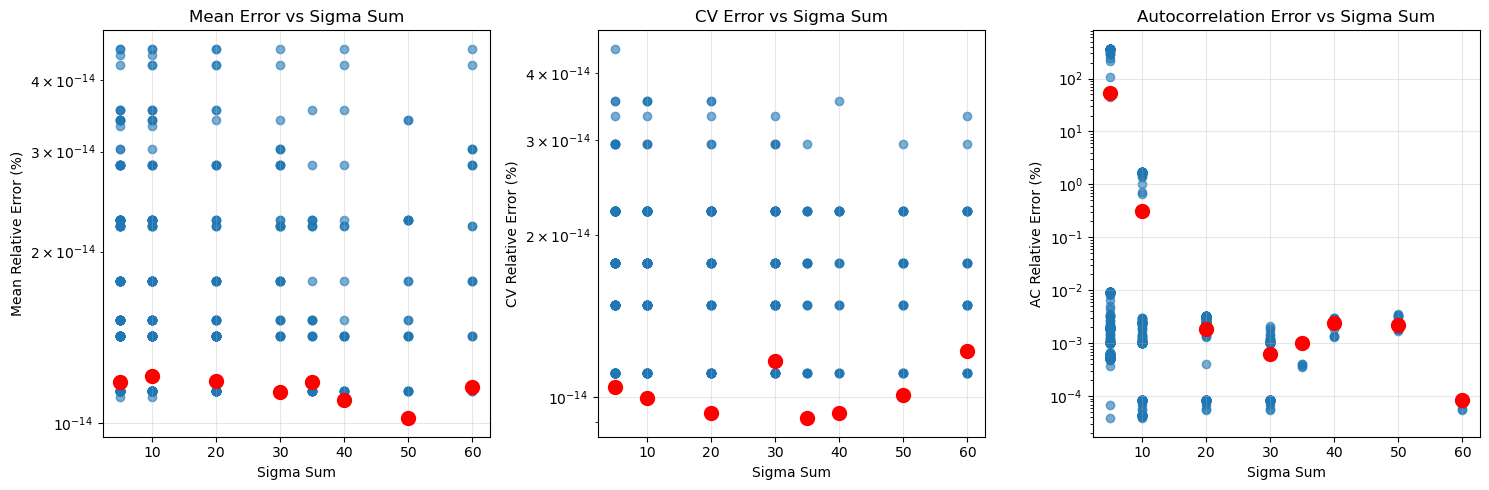

Error Summary by Sigma Sum:

Sigma Sum = 5:
  Mean Error: 0.0000 ± 0.0000%
  CV Error: 0.0000 ± 0.0000%
  AC Error: 53.7708 ± 124.8076%

Sigma Sum = 10:
  Mean Error: 0.0000 ± 0.0000%
  CV Error: 0.0000 ± 0.0000%
  AC Error: 0.3181 ± 0.6435%

Sigma Sum = 20:
  Mean Error: 0.0000 ± 0.0000%
  CV Error: 0.0000 ± 0.0000%
  AC Error: 0.0019 ± 0.0013%

Sigma Sum = 30:
  Mean Error: 0.0000 ± 0.0000%
  CV Error: 0.0000 ± 0.0000%
  AC Error: 0.0006 ± 0.0006%

Sigma Sum = 35:
  Mean Error: 0.0000 ± 0.0000%
  CV Error: 0.0000 ± 0.0000%
  AC Error: 0.0010 ± 0.0002%

Sigma Sum = 40:
  Mean Error: 0.0000 ± 0.0000%
  CV Error: 0.0000 ± 0.0000%
  AC Error: 0.0024 ± 0.0004%

Sigma Sum = 50:
  Mean Error: 0.0000 ± 0.0000%
  CV Error: 0.0000 ± 0.0000%
  AC Error: 0.0022 ± 0.0005%

Sigma Sum = 60:
  Mean Error: 0.0000 ± 0.0000%
  CV Error: 0.0000 ± 0.0000%
  AC Error: 0.0001 ± 0.0000%

Sigma Sum = 70:
  Mean Error: nan ± nan%
  CV Error: nan ± nan%
  AC Error: nan ± nan%

=== Success Rate ===
Total combin

/home/ianyang/stochastic_simulations/micromamba/envs/stochastic_sim/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/ianyang/stochastic_simulations/micromamba/envs/stochastic_sim/lib/python3.11/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/ianyang/stochastic_simulations/micromamba/envs/stochastic_sim/lib/python3.11/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [6]:
import matplotlib.pyplot as plt
# Create plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot mean error
axes[0].scatter(error_data['sigma_sum'], error_data['mean_error'], alpha=0.6)
# Add red dots for averages
for sigma in sigma_sum:
    mask = np.array(error_data['sigma_sum']) == sigma
    mean_errs = np.array(error_data['mean_error'])[mask]
    axes[0].scatter(sigma, np.mean(mean_errs), color='red', s=100, zorder=5)
axes[0].set_xlabel('Sigma Sum')
axes[0].set_ylabel('Mean Relative Error (%)')
axes[0].set_title('Mean Error vs Sigma Sum')
axes[0].set_yscale('log')
axes[0].grid(True, alpha=0.3)

# Plot CV error
axes[1].scatter(error_data['sigma_sum'], error_data['cv_error'], alpha=0.6)
# Add red dots for averages
for sigma in sigma_sum:
    mask = np.array(error_data['sigma_sum']) == sigma
    cv_errs = np.array(error_data['cv_error'])[mask]
    axes[1].scatter(sigma, np.mean(cv_errs), color='red', s=100, zorder=5)
axes[1].set_xlabel('Sigma Sum')
axes[1].set_ylabel('CV Relative Error (%)')
axes[1].set_title('CV Error vs Sigma Sum')
axes[1].set_yscale('log')
axes[1].grid(True, alpha=0.3)

# Plot autocorrelation error
axes[2].scatter(error_data['sigma_sum'], error_data['ac_error'], alpha=0.6)
# Add red dots for averages
for sigma in sigma_sum:
    mask = np.array(error_data['sigma_sum']) == sigma
    ac_errs = np.array(error_data['ac_error'])[mask]
    axes[2].scatter(sigma, np.mean(ac_errs), color='red', s=100, zorder=5)
axes[2].set_xlabel('Sigma Sum')
axes[2].set_ylabel('AC Relative Error (%)')
axes[2].set_title('Autocorrelation Error vs Sigma Sum')
axes[2].set_yscale('log')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary statistics
print("Error Summary by Sigma Sum:")
for sigma in sigma_sum:
    mask = np.array(error_data['sigma_sum']) == sigma
    mean_errs = np.array(error_data['mean_error'])[mask]
    cv_errs = np.array(error_data['cv_error'])[mask]
    ac_errs = np.array(error_data['ac_error'])[mask]
    
    print(f"\nSigma Sum = {sigma}:")
    print(f"  Mean Error: {np.mean(mean_errs):.4f} ± {np.std(mean_errs):.4f}%")
    print(f"  CV Error: {np.mean(cv_errs):.4f} ± {np.std(cv_errs):.4f}%")
    print(f"  AC Error: {np.mean(ac_errs):.4f} ± {np.std(ac_errs):.4f}%")
    
# print success rate 
print(f"\n=== Success Rate ===")
print(f"Total combinations: {success_data['total_combo_count']}")
print(f"Successful runs: {success_data['success_count']}")
print(f"Failed runs: {success_data['failure_count']}")
print(f"Success rate: {100*success_data['success_count']/success_data['total_combo_count']:.1f}%")

## Test Case: Simulation using Parameters

In [ ]:
from simulation.simulate_telegraph_model import simulate_one_telegraph_model_system
import pandas as pd 
import numpy as np

# mu=10, t_ac=2, cv=5, sigma_sum=5
mu_target = 10
t_ac_target = 1.5
cv_target = 2
sigma_sum = 5

# get the parameters using the scaled equations
rho,  d, sigma_b, sigma_u = find_tilda_parameters(sigma_sum, mu_target, t_ac_target, cv_target)
print('Parameters found:', rho,  d, sigma_b, sigma_u)

parameter_set = [{'sigma_b':sigma_b,
                  'sigma_u':sigma_u,
                  'rho':rho,
                  'd':d,
                  'label':0
                  }]

time_points = np.arange(0, 144.0, 1.0)
size = 200
df_results = simulate_one_telegraph_model_system(parameter_set, time_points, size)

Parameters found: 233.0430832546472 0.7763894541764733 0.16657637792410024 4.8334236220759


Simulating Telegraph Model Systems:   0%|          | 0/1 [00:00<?, ?it/s]

Running simulations on 12 cores...
System 1 parameters: {'sigmab': 0.16657637792410024, 'sigma_u': 4.8334236220759, 'rho': 233.0430832546472, 'd': 0.7763894541764733, 'label': 0}


Simulating Telegraph Model Systems: 100%|██████████| 1/1 [01:58<00:00, 118.21s/it]


In [ ]:
# check the specified stats
from stats.mean import calculate_mean
from stats.variance import calculate_variance
from stats.cv import calculate_cv
from stats.autocorrelation import calculate_autocorrelation, calculate_ac_time_interp1d

# # Extract normal trajectories (remove label column and convert to numpy array)
trajectories = df_results[df_results['label'] == 0].drop('label', axis=1).values

# Extract mean and variance from the report
mean_observed = calculate_mean(trajectories, parameter_set, use_steady_state=False)
variance_observed = calculate_variance(trajectories, parameter_set, use_steady_state=False)

# Calculate CV using calculate_cv function
cv_observed = calculate_cv(variance_observed, mean_observed)

# Calculate autocorrelation for the trajectories
autocorr_results = calculate_autocorrelation(df_results)

# Get mean autocorrelation values and lags for stress condition (label=0 in this case)
ac_mean = autocorr_results['stress_ac'].mean(axis=0)  # stress_ac corresponds to label=0
lags = autocorr_results['stress_lags']

# Calculate autocorrelation time using interpolation
ac_time_observed = calculate_ac_time_interp1d(ac_mean, lags)

print(f"\n=== Observed Statistics vs Targets ===")
print(f"Mean: Target = {mu_target}, Observed = {mean_observed:.3f}")
print(f"CV: Target = {cv_target}, Observed = {cv_observed:.3f}")
print(f"AC Time: Target = {t_ac_target}, Observed = {ac_time_observed:.3f}")
print(f"Variance: Observed = {variance_observed:.3f}")


=== Observed Statistics vs Targets ===
Mean: Target = 10, Observed = 286.272
CV: Target = 2, Observed = 0.131
AC Time: Target = 1.5, Observed = 1.492
Variance: Observed = 1403.001


/home/ianyang/stochastic_simulations/micromamba/envs/stochastic_sim/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/ianyang/stochastic_simulations/micromamba/envs/stochastic_sim/lib/python3.11/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


Do the same for multiple parameter combinations


In [10]:
import numpy as np
import itertools

# 50 means from 1 to 10000
means = np.linspace(1, 10000, 50)

# 20 variances log-spaced from 1 to 2000
variances = np.logspace(np.log10(1), np.log10(2000), 20)

# 10 autocorr times from 0.5 to 100 min
taus = np.linspace(0.5, 100, 10)

# build the 10 000 parameter triples
params = list(itertools.product(means, variances, taus))
assert len(params) == 10000

In [9]:
means

array([1.00000000e+00, 2.05061224e+02, 4.09122449e+02, 6.13183673e+02,
       8.17244898e+02, 1.02130612e+03, 1.22536735e+03, 1.42942857e+03,
       1.63348980e+03, 1.83755102e+03, 2.04161224e+03, 2.24567347e+03,
       2.44973469e+03, 2.65379592e+03, 2.85785714e+03, 3.06191837e+03,
       3.26597959e+03, 3.47004082e+03, 3.67410204e+03, 3.87816327e+03,
       4.08222449e+03, 4.28628571e+03, 4.49034694e+03, 4.69440816e+03,
       4.89846939e+03, 5.10253061e+03, 5.30659184e+03, 5.51065306e+03,
       5.71471429e+03, 5.91877551e+03, 6.12283673e+03, 6.32689796e+03,
       6.53095918e+03, 6.73502041e+03, 6.93908163e+03, 7.14314286e+03,
       7.34720408e+03, 7.55126531e+03, 7.75532653e+03, 7.95938776e+03,
       8.16344898e+03, 8.36751020e+03, 8.57157143e+03, 8.77563265e+03,
       8.97969388e+03, 9.18375510e+03, 9.38781633e+03, 9.59187755e+03,
       9.79593878e+03, 1.00000000e+04])